# 1. About the dataset:

###Tổng quan về bộ dữ liệu:
- Interest Rate( Tỷ lệ lãi suất cho vay ) được hiểu là mức lãi suất cho vay của một khách hàng.

- Bộ dữ liệu là tập các thông tin của khách hàng gồm 164309 mẫu dữ liệu và 14 thuộc tính khác nhau. Những thuộc tính này bao gồm các thông tin cá nhân khách hàng như số khoản vay, kinh nghiệm làm việc, thu nhập hàng năm, mục đích vay, thông tin tài khoản, và một số các thuộc tính liên quan khác.

###Tìm hiểu về các thuộc tính
| # | Thuộc tính | Mô tả
| --- | --- | ---
| 1 | Loan_ID | ID khoản vay của khách hàng
| 2 | Loan_Amount_Requested | Số tiền khách hàng yêu cầu cho vay ($)
| 3 | Length_Employed | Thời gian làm việc (năm)
| 4 | Home_Owner | Tình trạng nhà đất: sở hữu, thuê mướn, thế chấp,..
| 5 | Annual_Income | Thu nhập hằng năm
| 6 | Income_Verified | Thu nhập của khách hàng đã được xác nhận hay chưa
| 7 | Purpose_Of_Loan | Mục đích khi vay của khách hàng
| 8 | Debt_To_Income | Tỷ lệ số tiền thanh toán nợ và thu nhập tính theo tháng của khách hàng
| 9 | Inquiries_Last_6Mo | Số lần yêu cầu thanh toán đúng hạn trong 6 tháng gần nhất
| 10 | Months_Since_Deliquency	 | Số tháng kể từ lần cuối khách hàng vi phạm điều khoản cho vay
| 12 | Number_Open_Accounts | Số hạn mức tín dụng đang mở trong hồ sơ tín dụng của khách hàng
| 12 | Total_Accounts | Tổng số hạn mức tín dụng trong hồ sơ tín dụng của khách hàng
| 13 | Gender | Giới tính của khách hàng
| 14 | Interest_Rate | Lãi suất cho vay (được gán nhãn 1, 2, 3, với 3 là tỷ lệ lãi suất cho vay cao nhất)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Banking.csv")
df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [3]:
df.shape

(164309, 14)

- Tập dữ liệu có 164309 samples và 14 features


# 2. Data Analysis:

In [4]:
#Information on features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  object 
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138960 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

Nhận xét:
Qua việc kiểm tra các giá trị của features trong tập dữ liệu, ta thấy, có những điểm đặc biệt như sau:
- Feature **Loan_ID** có độ đa dạng cao (cardinality) và không ảnh hưởng đáng kể đến labels, để không gây ảnh hưởng đến việc đào tạo mô hình có thể xem xét loại bỏ features khỏi tập dữ liệu
- Feature **Length_Employed** ngoài các giá trị thường thấy là **2 years**, **2 years**, ... còn có 2 cái giá trị đặc biệt là **< 1 year** và **10+ years**. Cần xem xét xử lý và đưa feature này về kiểu dữ liệu phù hợp hơn(numerical) để xây dựng mô hình
- **Income_Verified**: feature này thể hiện mức thu nhập của khách hàng đã được xác nhận hay chưa. Vì vây có thể xem giá trị **VERIFIED - income** và **VERIFIED - income source** có ý nghĩa tương tự nhau(thu nhập đã được xác nhận), nên xem xét chuyển về cùng một giá trị.
- **Purpose_Of_Loan**: có khá nhiều mục đích cho vay, cần xem xét đồ thị phân bố, tần suất của các giá trị để đưa ra hướng xử lý tốt hơn.

In [5]:
# Checking null:
df.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

- Các features có giá trị Null là **Length_Employed**, **Home_Owner**, **Annual_Income** và **Months_Since_Deliquency**

In [6]:
# Describe the values of feature
for column in df.columns:
    unique_values = df[column].unique()
    print(f"\033[1m{column}:\033[0m \n {unique_values}")

Loan_ID: 
 [10000001 10000002 10000003 ... 10164307 10164308 10164309]
Loan_Amount_Requested: 
 ['7,000' '30,000' '24,725' ... '28,950' '33,325' '29,825']
Length_Employed: 
 ['< 1 year' '4 years' '7 years' '8 years' '2 years' '10+ years' '1 year'
 nan '6 years' '9 years' '3 years' '5 years']
Home_Owner: 
 ['Rent' 'Mortgage' nan 'Own' 'Other' 'None']
Annual_Income: 
 [68000.      nan 75566.4 ... 51024.  28721.4 24864. ]
Income_Verified: 
 ['not verified' 'VERIFIED - income' 'VERIFIED - income source']
Purpose_Of_Loan: 
 ['car' 'debt_consolidation' 'credit_card' 'home_improvement'
 'major_purchase' 'other' 'medical' 'small_business' 'moving' 'wedding'
 'vacation' 'house' 'educational' 'renewable_energy']
Debt_To_Income: 
 [18.37 14.93 15.88 ... 38.03 39.04 35.06]
Inquiries_Last_6Mo: 
 [0 3 1 2 4 5 6 7 8]
Months_Since_Deliquency: 
 [ nan  17.  16.  68.  13.   6.  64.  10.  63.  33.  22.  28.   8.  26.
  41.  46.  62.  21.  12.  52.   3.  65.  43.  53.  44.   1.  11.  71.
  23.  15.  48.  

In [7]:
# Check the effect of the null values on the dataset:
feature_cols = df.columns
def display_null(df, feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        null_count = df[col].isnull().sum()
        if null_count > 0:
            print(f"{col} has {null_count*100/n_rows:.2f}% null values.")

display_null(df, feature_cols)

Length_Employed has 4.49% null values.
Home_Owner has 15.43% null values.
Annual_Income has 15.28% null values.
Months_Since_Deliquency has 53.79% null values.


Nhận xét:
- Feature **Length_Employed** với tỷ lệ các giá trị Null khá nhỏ (4.49%), không gây ảnh hưởng đến đáng kể đến bộ dữ liệu. Vì vậy có thể cân nhắc xóa những samples có giá trị này ra khỏi tập dữ liệu.
- Các giá trị Null của **Home_Owner** và **Annual_Income** chiếm tỷ lệ khá đáng kể (~15%). Vì vậy sẽ xử lý các giá trị Null này mà không bỏ chúng khỏi tập dữ liệu.
- Đặc biệt **Months_Since_Deliquency** có đến 53.79% giá trị Null.

### **Trực quan hóa dữ liệu**

In [8]:
df1 = df.copy()

In [9]:
# Drop loan_id:
df1.drop('Loan_ID', axis=1, inplace=True)

In [10]:
df1.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [11]:
df['Length_Employed'].value_counts()

10+ years    52915
2 years      14620
3 years      12974
< 1 year     12805
5 years      10814
1 year       10422
4 years       9784
7 years       9308
6 years       9094
8 years       7917
9 years       6285
Name: Length_Employed, dtype: int64

- Dữ diệu feature `Length_Employed` tồn tại samples 10+ years và < 1 year nên biến đổi 10+ years thành 10 years và < 1 year thành 0 year.

In [12]:
df1['Length_Employed'] = df1['Length_Employed'].replace('10+ years', '10 years')
df1['Length_Employed'] = df1['Length_Employed'].replace('< 1 year', '0 years')
df1['Length_Employed'] = df1['Length_Employed'].replace('1 year', '1 years')

Chuyển đổi kiểu dữ liệu:
- Thuộc tính `Interest_Rate` được đánh giá dựa trên các mức độ 1, 2, 3 nên ta chuyển về object.
- Thuộc tính `Loan_Amount_Requested` và thuộc tính `Length_Employed` chuyển đổi về kiểu dữ liệu numerical.

In [13]:
df1['Interest_Rate'] = df1['Interest_Rate'].astype('object') # # To convert the data type to categorical.
df1['Loan_Amount_Requested'] = df1['Loan_Amount_Requested'].str.replace(',', '').astype('float64') # To convert the data type to numerical.
df1['Length_Employed'] = df1['Length_Employed'].str.replace('years', '').astype('float64') # To convert the data type to numerical.

In [14]:
df1.describe() # To describe numerical data types.

,Loan_Amount_Requested,Length_Employed,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts
count,164309.00000,156938.000000,1.392070e+05,164309.000000,164309.000000,75930.000000,164309.000000,164309.000000
mean,14349.33692,5.993201,7.333116e+04,17.207189,0.781698,34.229356,11.193818,25.067665
std,8281.86870,3.628592,6.037750e+04,7.845083,1.034747,21.761180,4.991813,11.583067
min,500.00000,0.000000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000
25%,8000.00000,3.000000,4.500000e+04,11.370000,0.000000,16.000000,8.000000,17.000000
50%,12075.00000,6.000000,6.300000e+04,16.840000,0.000000,31.000000,10.000000,23.000000
75%,20000.00000,10.000000,8.869750e+04,22.780000,1.000000,50.000000,14.000000,32.000000
max,35000.00000,10.000000,7.500000e+06,39.990000,8.000000,180.000000,76.000000,156.000000


In [15]:
df1.describe(include=['object']) # To describe categorical data types.

,Home_Owner,Income_Verified,Purpose_Of_Loan,Gender,Interest_Rate
count,138960,164309,164309,164309,164309
unique,5,3,14,2,3
top,Mortgage,VERIFIED - income,debt_consolidation,Male,2
freq,70345,59421,97101,117176,70580


In [16]:
# Get categorical columns and numerical columns
categorical_cols = [feature for feature in df1.columns if df1[feature].dtype == "object"]
numerical_cols = [feature for feature in df1.columns if df1[feature].dtype != "object"]
print('Categorical columns: ', categorical_cols)
print('Numerical columns:', numerical_cols)

Categorical columns:  ['Home_Owner', 'Income_Verified', 'Purpose_Of_Loan', 'Gender', 'Interest_Rate']
Numerical columns: ['Loan_Amount_Requested', 'Length_Employed', 'Annual_Income', 'Debt_To_Income', 'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts', 'Total_Accounts']


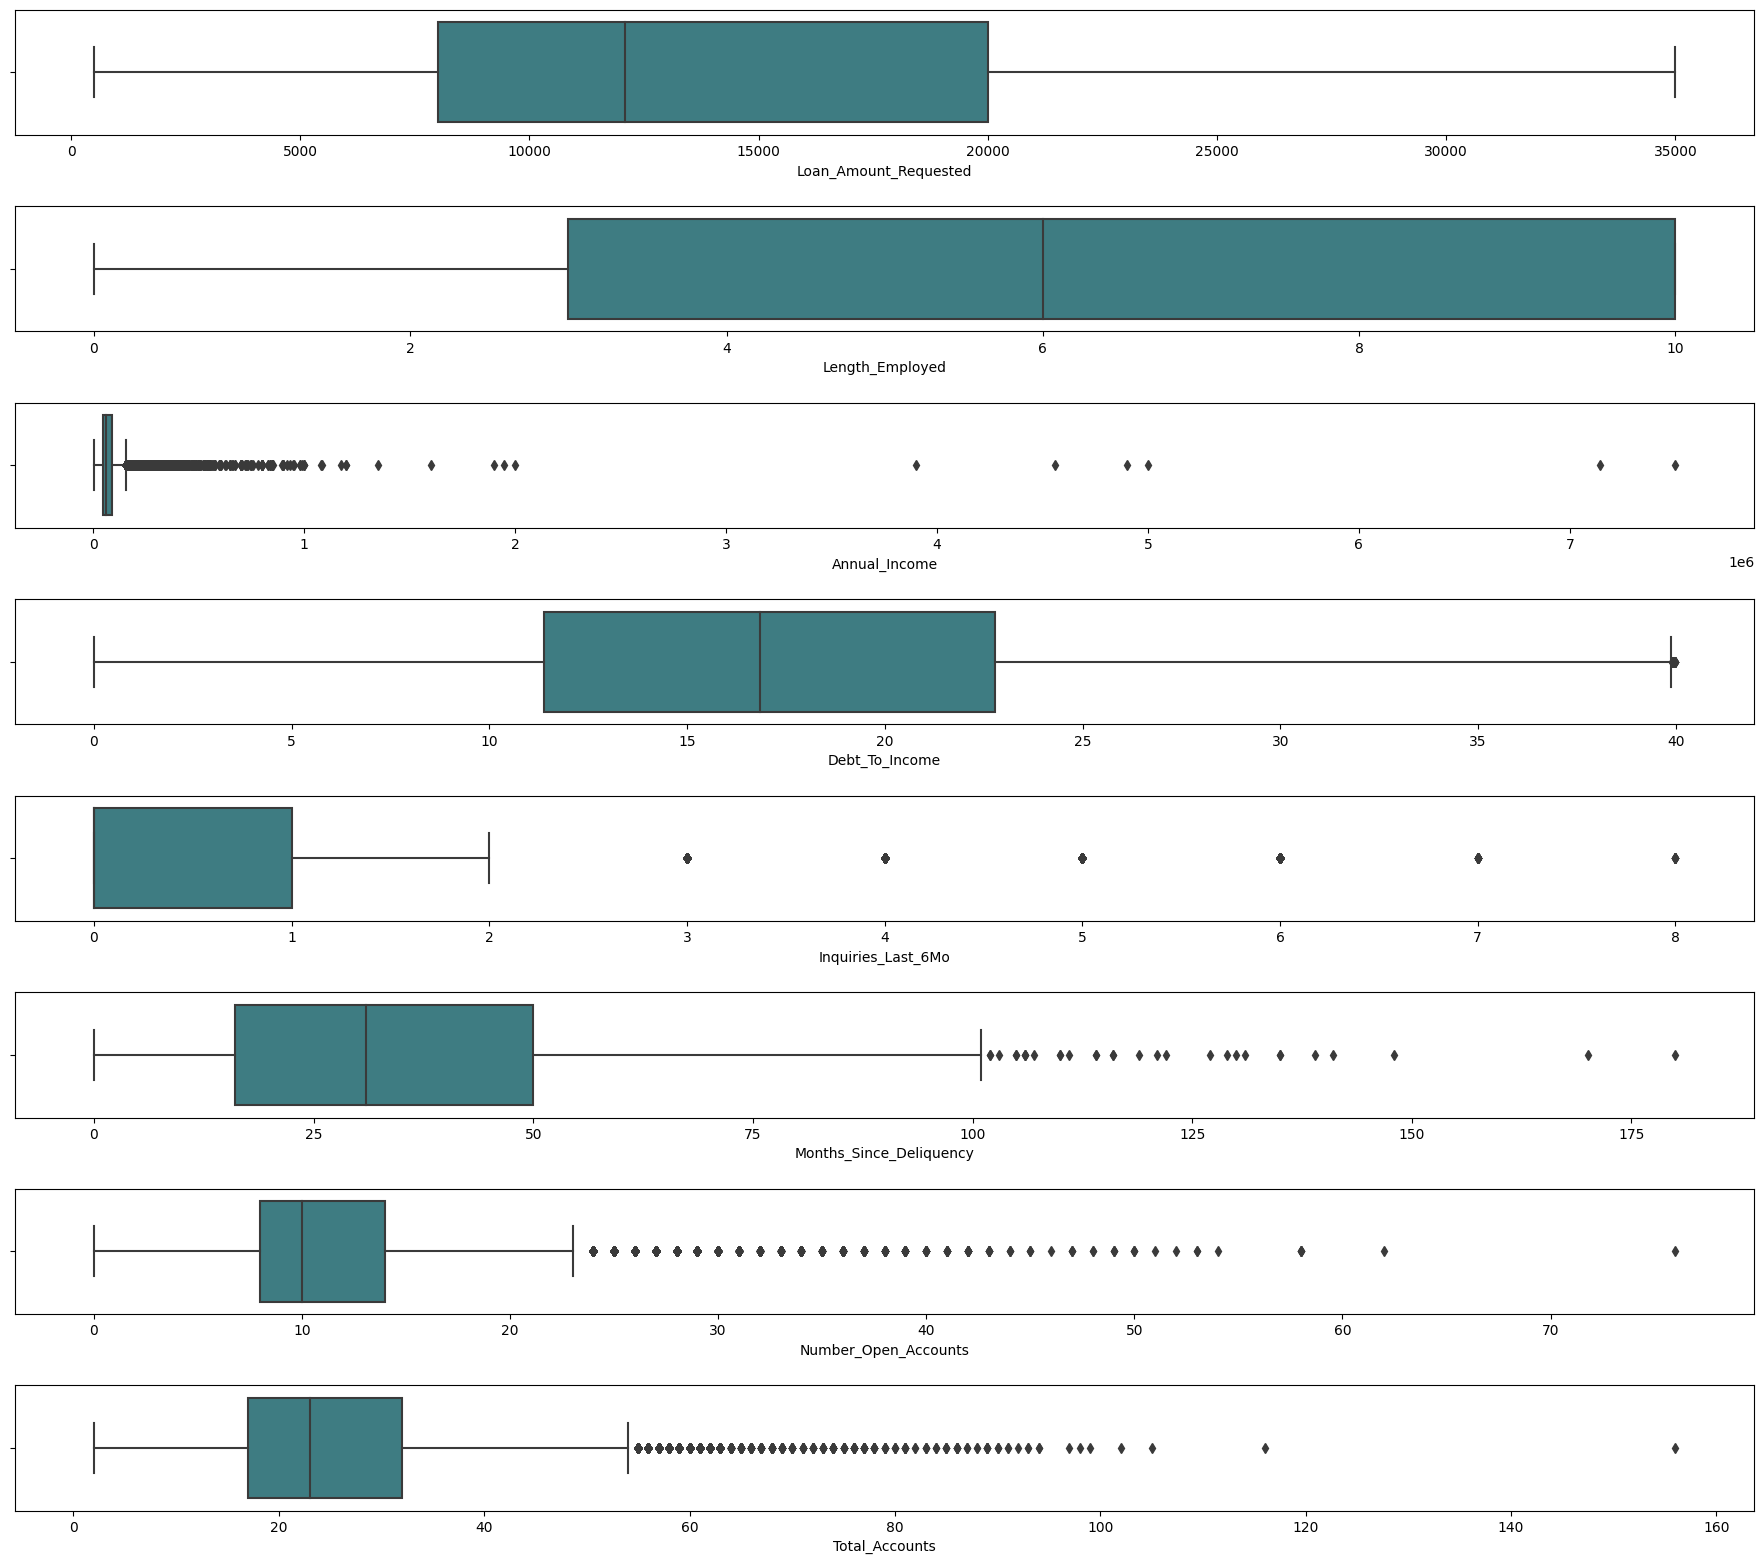

In [17]:
# Draw boxplot to see distribution of each feature which has datatype is numerical in the dataset:
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(18, 16), sharex=False, sharey=False)

for i, column in enumerate(numerical_cols):
    sns.boxplot(x=column, data=df1, ax=axes[i], palette='crest')
plt.tight_layout(pad=2.0)

Nhận xét:
- Feature **Annual_Income** có nhiều điểm ngoại lai chủ yếu tập trung gần giá trị biên lớn nhất. Ngoài ra có một số ít điểm ngoại lai có giá trị rất lớn, cần xem xét loại bỏ để không gây ảnh hưởng đến mô hình.
- Tương tự, đa số các features numerical còn lại đều có các giá trị ngoại lai và cần xem xét loại bỏ các giá trị ngoại lai vượt xa phân phối của feature.

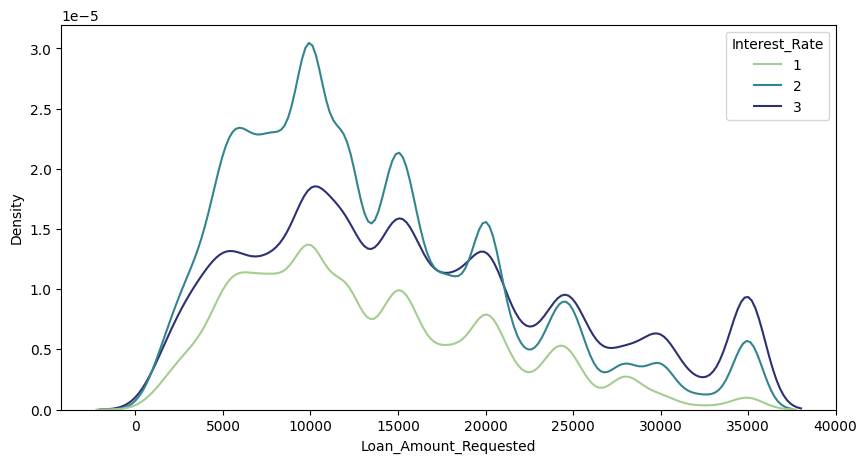

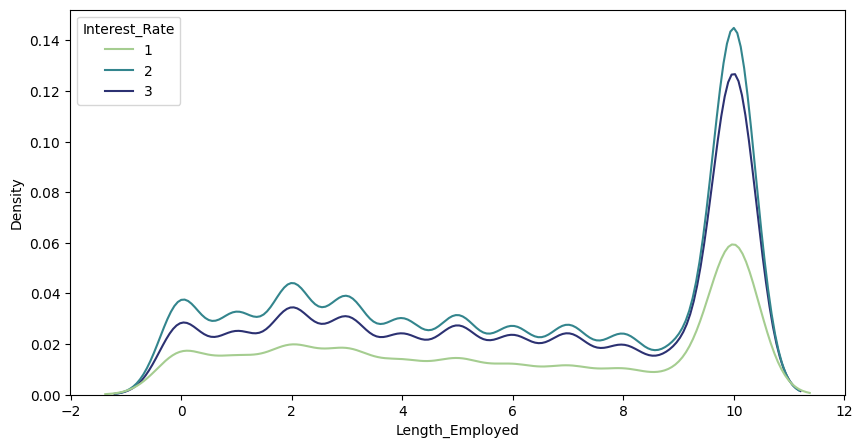

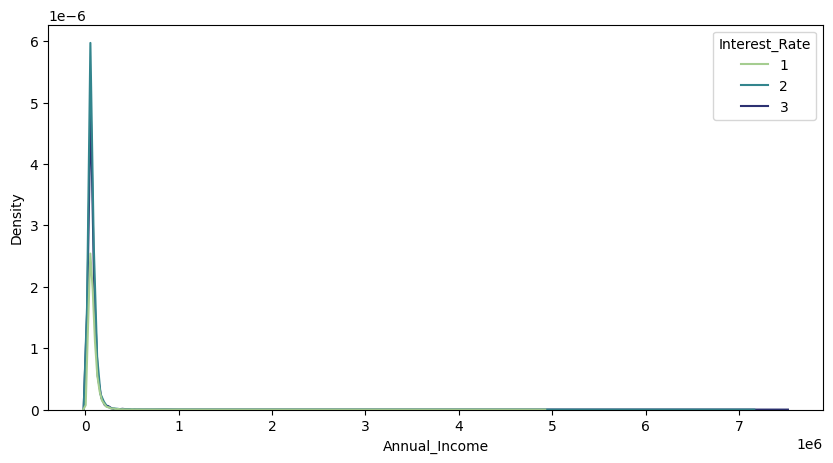

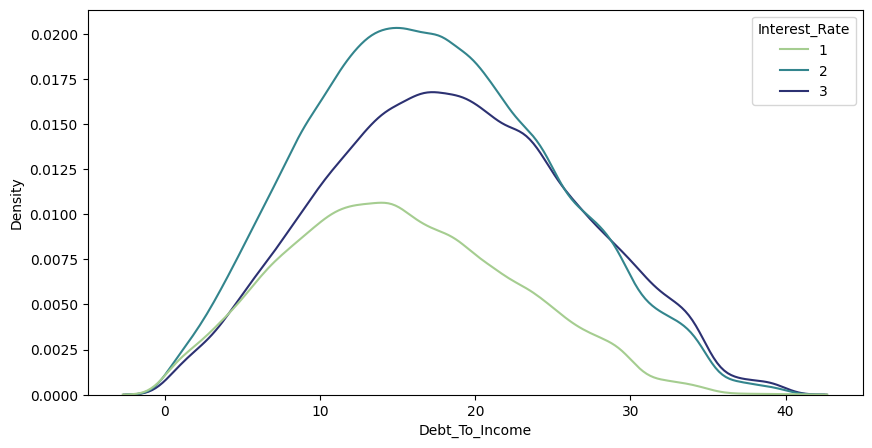

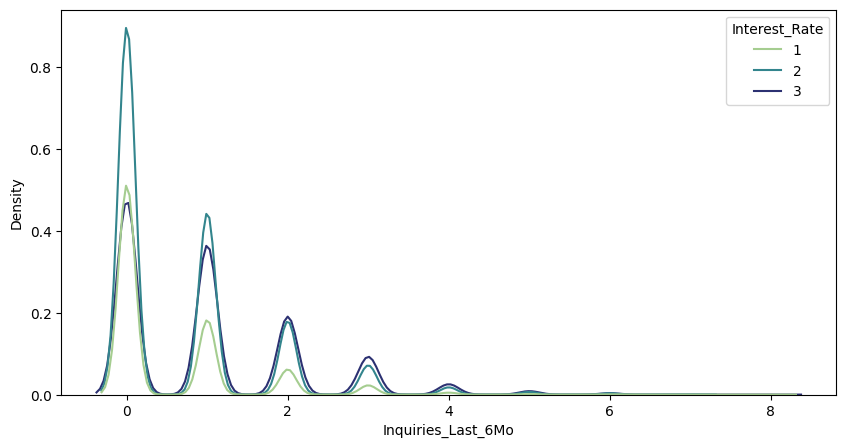

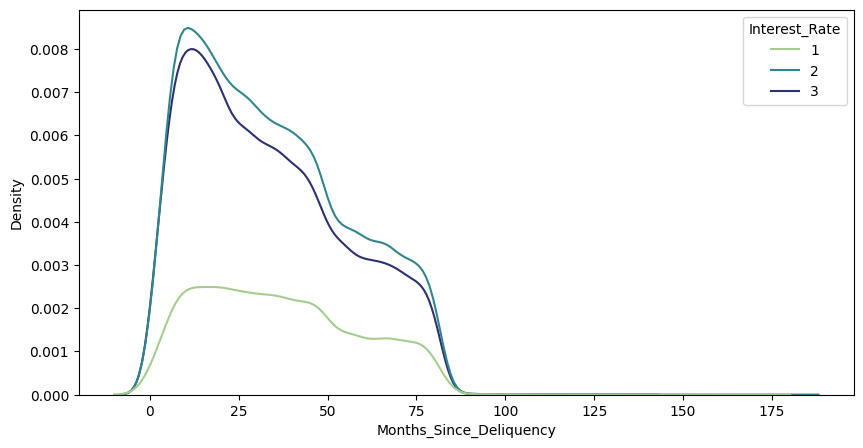

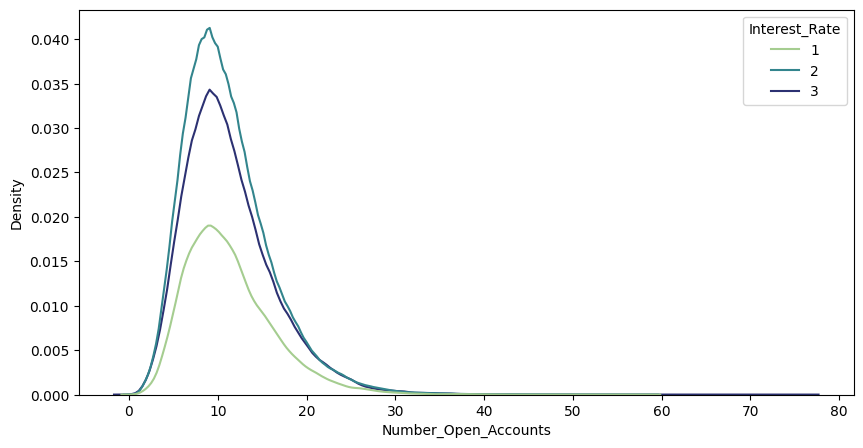

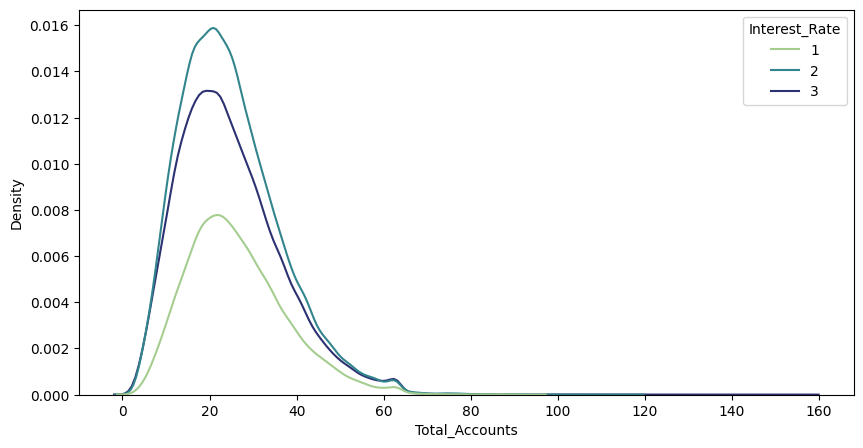

In [18]:
# Draw kdeplot to see probability distribution of some features which has datatype is numerical in the dataset with 'Interest_Rate' for feature in numerical_cols:
for feature in numerical_cols :
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.kdeplot(data=df1, hue='Interest_Rate', x=feature, ax=ax, palette='crest')
    plt.show()

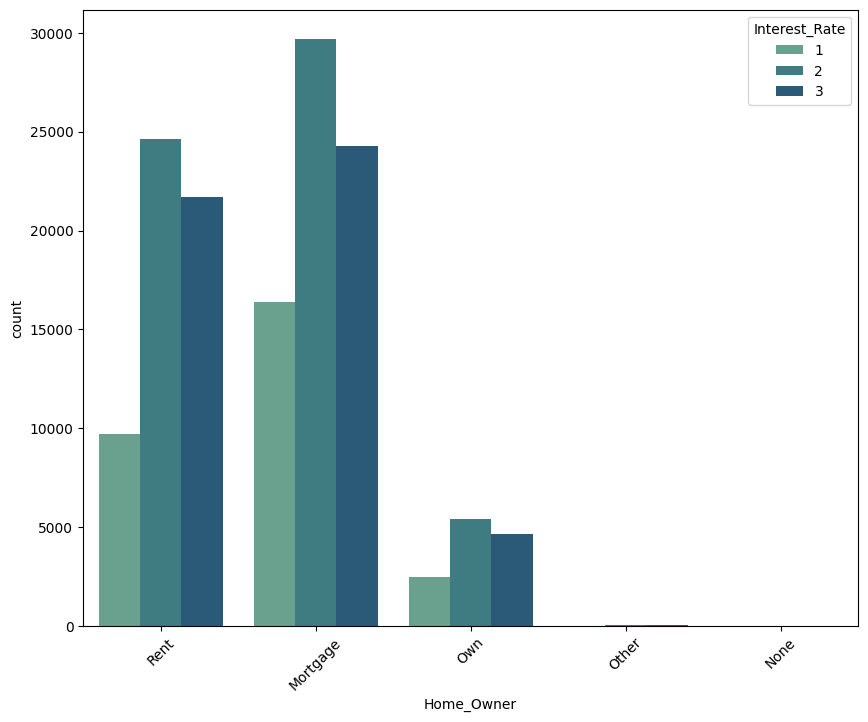

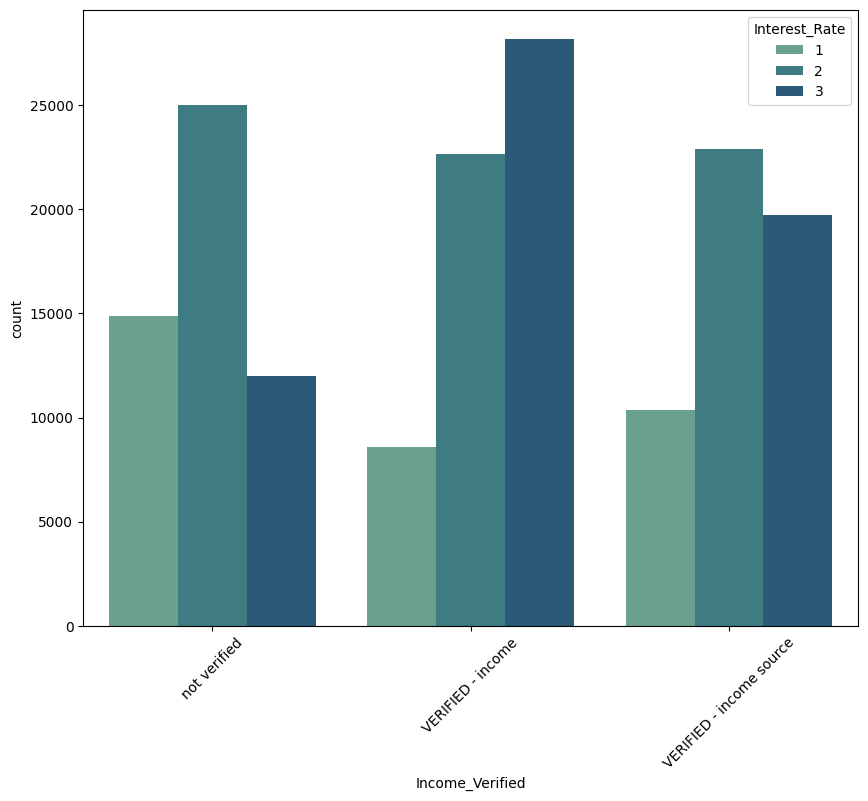

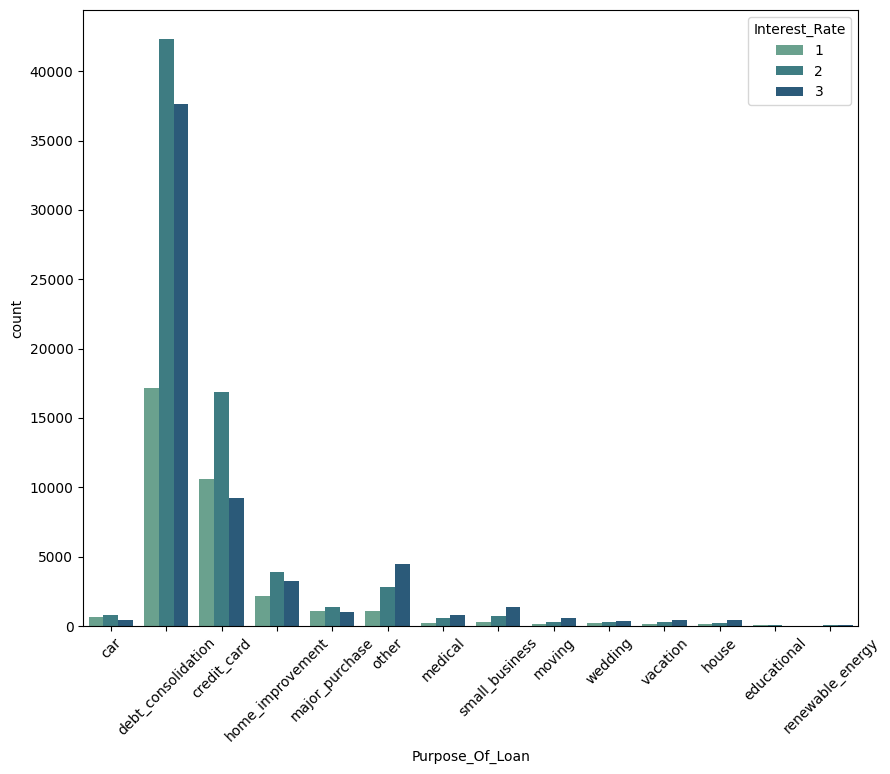

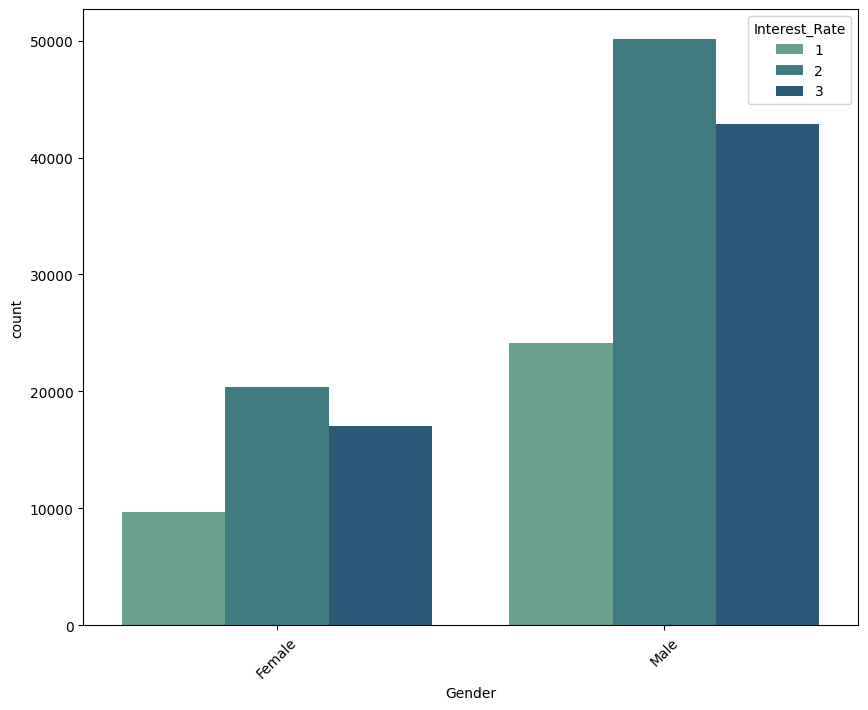

In [19]:
#Draw countplot to see distribution of some features which has datatype is categorical in the dataset with "Interest_Rate".
target = 'Interest_Rate'
for feature in categorical_cols:
    if feature != 'Interest_Rate':
        fig, ax = plt.subplots(figsize=(10, 8))
        sns.countplot(x=feature, hue=target, data=df1, ax=ax, palette='crest')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        plt.show()

Nhận xét:
- Về `sở hữu bất động sản`: Số lượng khách hàng yêu cầu cho vay khi đang thuê nhà hoặc có nhà đang chế chấp cao hơn hẳn so với lượng khách hàng còn lại.
- Về `thu nhập`: Mức tỷ lệ cho vay phổ biến nhất đối với các khách hàng đã được xác nhận thu nhập thì là 3 và đối với các nhóm khách hàng còn lại là 2.
- Về `mục đích vay`: Phần lớn các khách hàng đi vay với mục đích hợp nhất nợ và thanh toán thẻ tín dụng. Các lí do khác như mua xe, đầu tư, khởi nghiệp, chữa bệnh chiếm số lượng ít và rất ít.
- Về `giới tính`: Nam giới có xu hướng thực hiện các khoản vay nhiều hơn nữ giới.

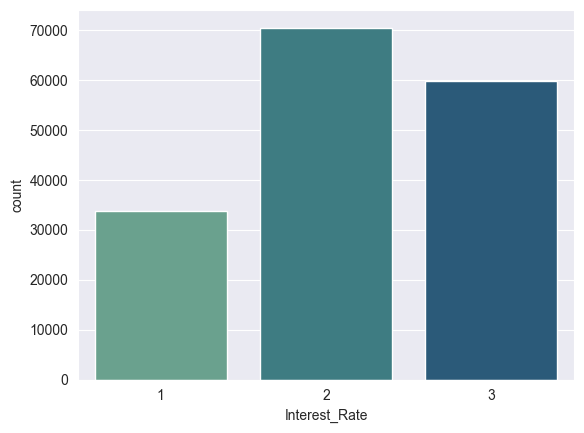

Interest_Rate
1    33806
2    70580
3    59923
dtype: int64


In [20]:
# To check if dataset is balanced:
sns.set_style('darkgrid')
sns.countplot(data=df1, x='Interest_Rate', palette='crest')
plt.show()

size = df1.groupby("Interest_Rate").size()
print(size)

Nhận xét:
- Qua biểu đồ ta nhận thấy số lượng samples với label `Interest_Rate` là 2, 3 khá đồng đều. Bên cạnh đó label `Interest_Rate` 1 với lượng samples ít hơn một nửa so với 2 labels sau. Vì vậy có thể cân nhắc dùng phương pháp Upsampling để xử lý mất cân bằng dữ liệu trong trường hợp này.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5500\2567335110.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot=True, cmap='crest')


<AxesSubplot: >

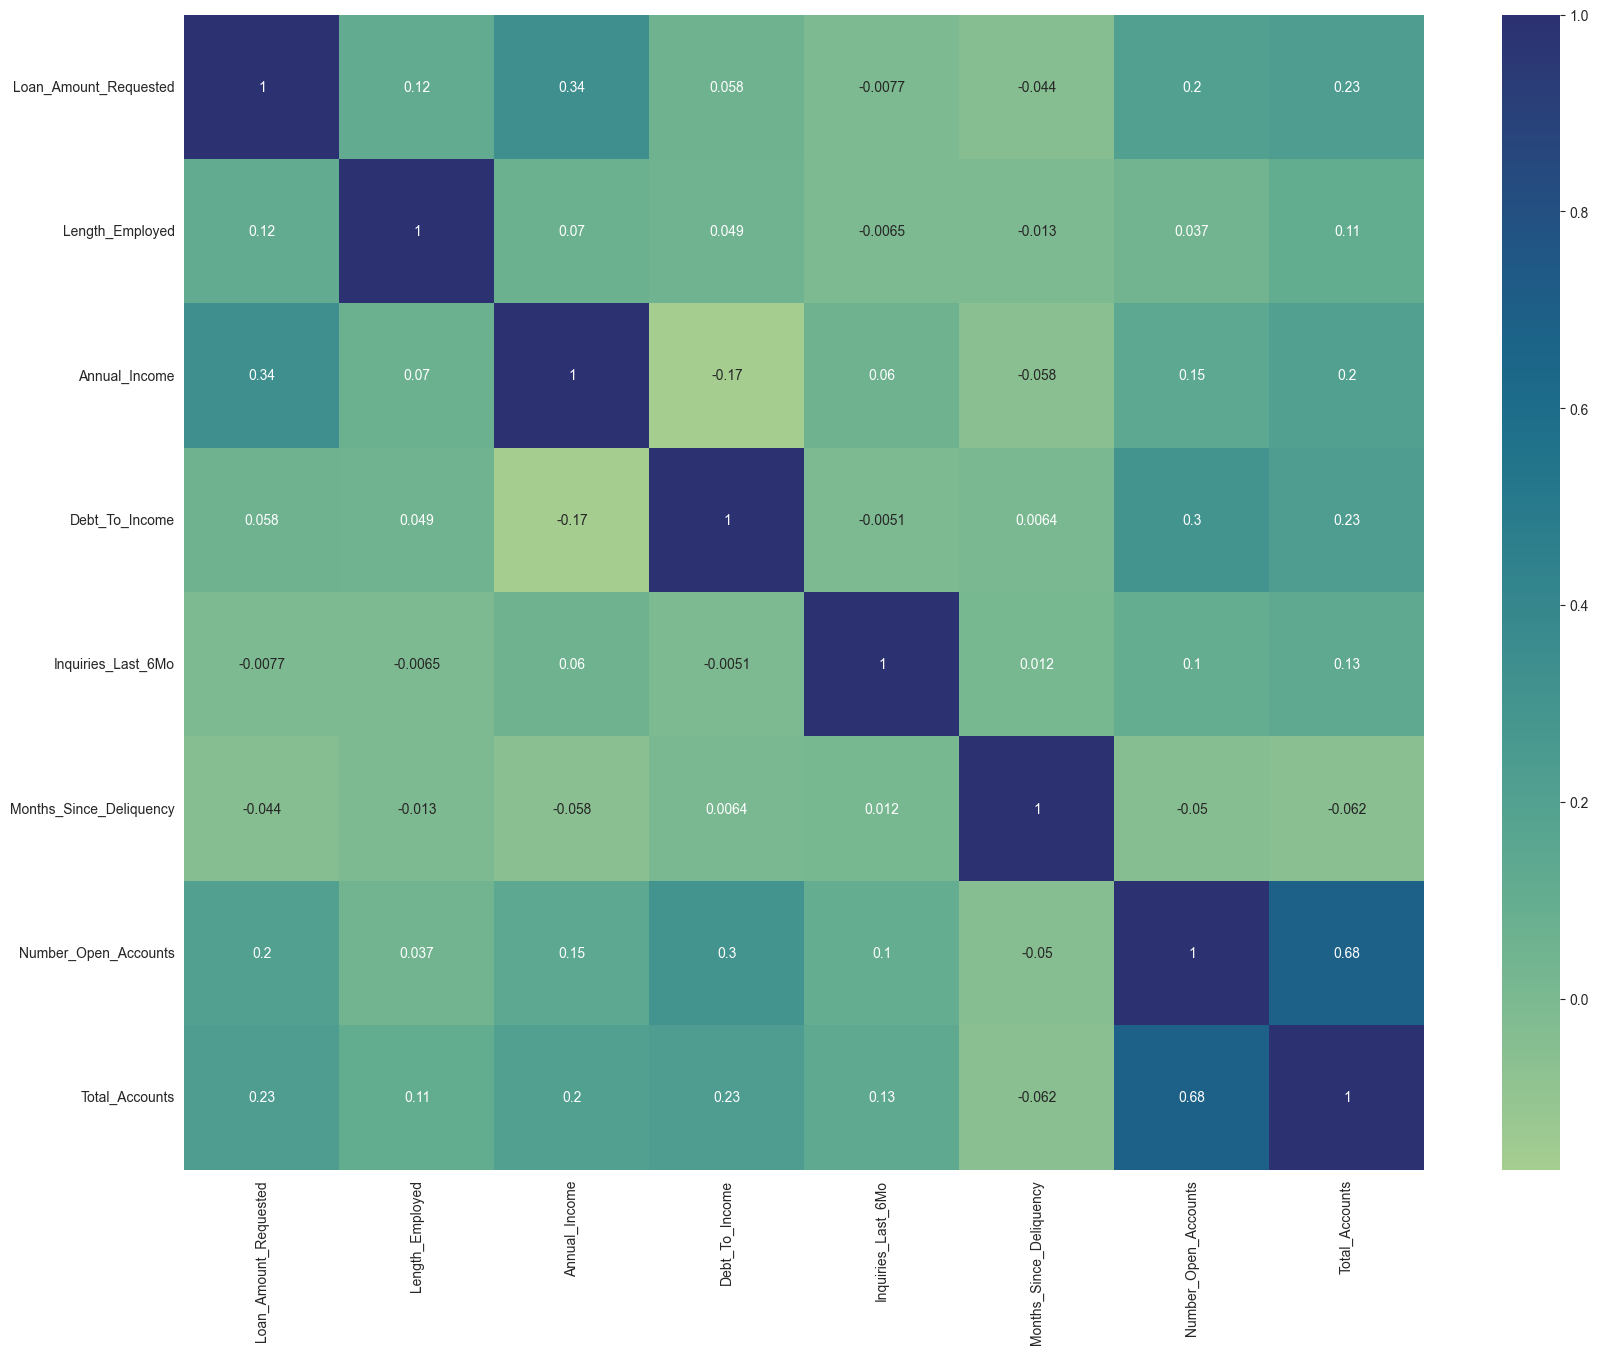

In [21]:
# Heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(df1.corr(), annot=True, cmap='crest')

# 4. Data Preprocessing:

In [22]:
df2 = df.copy()

Kiểm tra các giá trị trùng lặp:

In [23]:
df2[df2.duplicated()]

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate


**Xử lý những giá trị không hợp lệ trong dữ liệu:**

- Dữ diệu feature `Length_Employed` tồn tại samples 10+ years và < 1 year nên biến đổi 10+ years thành 10 years và < 1 year thành 0 years.

In [24]:
df2['Length_Employed'] = df2['Length_Employed'].replace('10+ years', '10 years')
df2['Length_Employed'] = df2['Length_Employed'].replace('< 1 year', '0 years')
df2['Length_Employed'] = df2['Length_Employed'].replace('1 year', '1 years')

data_drop = df2[df2['Home_Owner'] == 'None'].index
df2.drop(data_drop, inplace=True)
data_drop = df2[df2['Home_Owner'] == 'Other'].index
df2.drop(data_drop, inplace=True)

Chuyển đổi kiểu dữ liệu:

In [25]:
df2['Loan_ID'] = df2['Loan_ID'].astype('object')
df2['Interest_Rate'] = df2['Interest_Rate'].astype('object') # To convert the data type to categorical.
df2['Loan_Amount_Requested'] = df2['Loan_Amount_Requested'].str.replace(',', '').astype('float64') # To convert the data type to numerical.
df2['Length_Employed'] = df2['Length_Employed'].str.replace('years', '').astype('float64') # To convert the data type to numerical.

In [26]:
# Get categorical columns and numerical columns:
categorical_cols = [feature for feature in df.columns if df2[feature].dtype == "object"]
numerical_cols = [feature for feature in df.columns if df2[feature].dtype != "object"]
print('Categorical columns: ', categorical_cols)
print('Numerical columns:', numerical_cols)

Categorical columns:  ['Loan_ID', 'Home_Owner', 'Income_Verified', 'Purpose_Of_Loan', 'Gender', 'Interest_Rate']
Numerical columns: ['Loan_Amount_Requested', 'Length_Employed', 'Annual_Income', 'Debt_To_Income', 'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts', 'Total_Accounts']


**Xử lý các giá trị Null, giá trị NaN:**

In [27]:
df2['Length_Employed'].fillna(df2['Length_Employed'].mode()[0], inplace=True)
df2['Annual_Income'].fillna(df2['Annual_Income'].median(), inplace=True)
# df2['Months_Since_Deliquency'].fillna(df2['Months_Since_Deliquency'].median(), inplace=True)
#df2['Months_Since_Deliquency'] = df2['Months_Since_Deliquency'].apply(lambda x: 0 if x == np.nan else x)
df2['Home_Owner'].fillna(df2['Home_Owner'].fillna(df2['Home_Owner'].mode()[0]),inplace = True)

In [28]:
deli = []
for i in df2['Months_Since_Deliquency']:
    if pd.isnull(i) == True:
        deli.append(0)
    else:
        deli.append(1)
df2['Deliquency'] = deli
df2.drop('Months_Since_Deliquency',axis = 1,inplace = True)

In [29]:
# Checking null:
df2.isnull().sum()

Loan_ID                  0
Loan_Amount_Requested    0
Length_Employed          0
Home_Owner               0
Annual_Income            0
Income_Verified          0
Purpose_Of_Loan          0
Debt_To_Income           0
Inquiries_Last_6Mo       0
Number_Open_Accounts     0
Total_Accounts           0
Gender                   0
Interest_Rate            0
Deliquency               0
dtype: int64

**Xử lý các giá trị outliers:**

# 5. Feature Engineering:

Thêm thuộc tính mới:

In [30]:
df2["Income_Verified"] = df2["Income_Verified"].replace({"VERIFIED - income source":"verified",
                                                         "VERIFIED - income":"verified"})

df2["Purpose_Of_Loan"] = df2["Purpose_Of_Loan"].replace({"home_improvement":"other",
                                                         "major_purchase":"other",
                                                         "small_business":"other",
                                                         "car":"other",
                                                         "medical":"other",
                                                         "moving":"other",
                                                         "vacation":"other",
                                                         "wedding":"other",
                                                         "house":"other",
                                                         "renewable_energy":"other",
                                                         "educational":"other"})

df2["Number_Invalid_Acc"] = df2["Total_Accounts"] - df2["Number_Open_Accounts"]
df2["Number_Years_To_Repay_Debt"] = df2["Loan_Amount_Requested"]/df2["Annual_Income"]

Xóa những cột có độ đa năng cao và đóng góp thấp:

In [31]:
colsToRemove = ['Loan_ID', 'Gender', 'Number_Open_Accounts', 'Length_Employed', 'Number_Open_Accounts', 'Total_Accounts', 'Annual_Income'] #, 'Home_Owner']
df2.drop(colsToRemove, inplace=True, axis=1)
df2.head()

,Loan_Amount_Requested,Home_Owner,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Interest_Rate,Deliquency,Number_Invalid_Acc,Number_Years_To_Repay_Debt
0,7000.0,Rent,not verified,other,18.37,0,1,0,5,0.102941
1,30000.0,Mortgage,verified,debt_consolidation,14.93,0,3,1,12,0.476190
2,24725.0,Mortgage,verified,debt_consolidation,15.88,0,3,0,4,0.327196
3,16000.0,Mortgage,verified,debt_consolidation,14.34,3,3,0,6,0.284900
4,17000.0,Own,verified,debt_consolidation,22.17,1,1,0,11,0.177083


**Encode categorical data:**

,Loan_Amount_Requested,Home_Owner,Income_Verified,Debt_To_Income,Inquiries_Last_6Mo,Interest_Rate,Deliquency,Number_Invalid_Acc,Number_Years_To_Repay_Debt,Purpose_Of_Loan_credit_card,Purpose_Of_Loan_debt_consolidation,Purpose_Of_Loan_other
count,164250.000000,164250.000000,164250.00000,164250.000000,164250.000000,164250.000000,164250.000000,164250.000000,164250.000000,164250.000000,164250.000000,164250.000000
mean,14350.742770,0.493644,0.68439,17.208075,0.781674,1.158989,0.462119,13.873967,0.220447,0.223227,0.591038,0.185735
std,8282.210993,0.634408,0.46476,7.845089,1.034780,0.738358,0.498564,8.955733,0.114241,0.416410,0.491644,0.388894
min,500.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000789,0.000000,0.000000,0.000000
25%,8000.000000,0.000000,0.00000,11.370000,0.000000,1.000000,0.000000,7.000000,0.131250,0.000000,0.000000,0.000000
50%,12075.000000,0.000000,1.00000,16.840000,0.000000,1.000000,0.000000,12.000000,0.205556,0.000000,1.000000,0.000000
75%,20000.000000,1.000000,1.00000,22.780000,1.000000,2.000000,1.000000,19.000000,0.300000,0.000000,1.000000,0.000000
max,35000.000000,2.000000,1.00000,39.990000,8.000000,2.000000,1.000000,148.000000,0.821429,1.000000,1.000000,1.000000


,Loan_Amount_Requested,Home_Owner,Income_Verified,Debt_To_Income,Inquiries_Last_6Mo,Interest_Rate,Deliquency,Number_Invalid_Acc,Number_Years_To_Repay_Debt,Purpose_Of_Loan_credit_card,Purpose_Of_Loan_debt_consolidation,Purpose_Of_Loan_other
0,7000.0,1,0,18.37,0,0,0,5,0.102941,0,0,1
1,30000.0,0,1,14.93,0,2,1,12,0.476190,0,1,0
2,24725.0,0,1,15.88,0,2,0,4,0.327196,0,1,0
3,16000.0,0,1,14.34,3,2,0,6,0.284900,0,1,0
4,17000.0,2,1,22.17,1,0,0,11,0.177083,0,1,0


,Loan_Amount_Requested,Home_Owner,Income_Verified,Debt_To_Income,Inquiries_Last_6Mo,Interest_Rate,Deliquency,Number_Invalid_Acc,Number_Years_To_Repay_Debt,Purpose_Of_Loan_credit_card,Purpose_Of_Loan_debt_consolidation,Purpose_Of_Loan_other
Loan_Amount_Requested,1.000000,-0.146534,0.353868,0.058216,-0.007672,0.132358,-0.011475,0.188740,0.639199,0.026210,0.115934,-0.174629
Home_Owner,-0.146534,1.000000,-0.039378,0.013172,-0.041112,0.043295,-0.038537,-0.150131,0.006372,0.004415,-0.009017,0.006673
Income_Verified,0.353868,-0.039378,1.000000,0.105498,0.055097,0.196791,0.014156,0.081107,0.269616,-0.026651,0.052060,-0.037278
Debt_To_Income,0.058216,0.013172,0.105498,1.000000,-0.005145,0.152446,-0.018950,0.128716,0.223144,0.020952,0.104612,-0.154685
Inquiries_Last_6Mo,-0.007672,-0.041112,0.055097,-0.005145,1.000000,0.189042,0.043754,0.113735,-0.071413,-0.042771,-0.014832,0.064548
Interest_Rate,0.132358,0.043295,0.196791,0.152446,0.189042,1.000000,0.113809,-0.054232,0.188544,-0.141908,0.085530,0.043821
Deliquency,-0.011475,-0.038537,0.014156,-0.018950,0.043754,0.113809,1.000000,0.209171,-0.084153,-0.040898,0.024278,0.013099
Number_Invalid_Acc,0.188740,-0.150131,0.081107,0.128716,0.113735,-0.054232,0.209171,1.000000,-0.009967,-0.018407,0.042292,-0.033756
Number_Years_To_Repay_Debt,0.639199,0.006372,0.269616,0.223144,-0.071413,0.188544,-0.084153,-0.009967,1.000000,0.039174,0.129471,-0.205624
Purpose_Of_Loan_credit_card,0.026210,0.004415,-0.026651,0.020952,-0.042771,-0.141908,-0.040898,-0.018407,0.039174,1.000000,-0.644455,-0.256030


<AxesSubplot: >

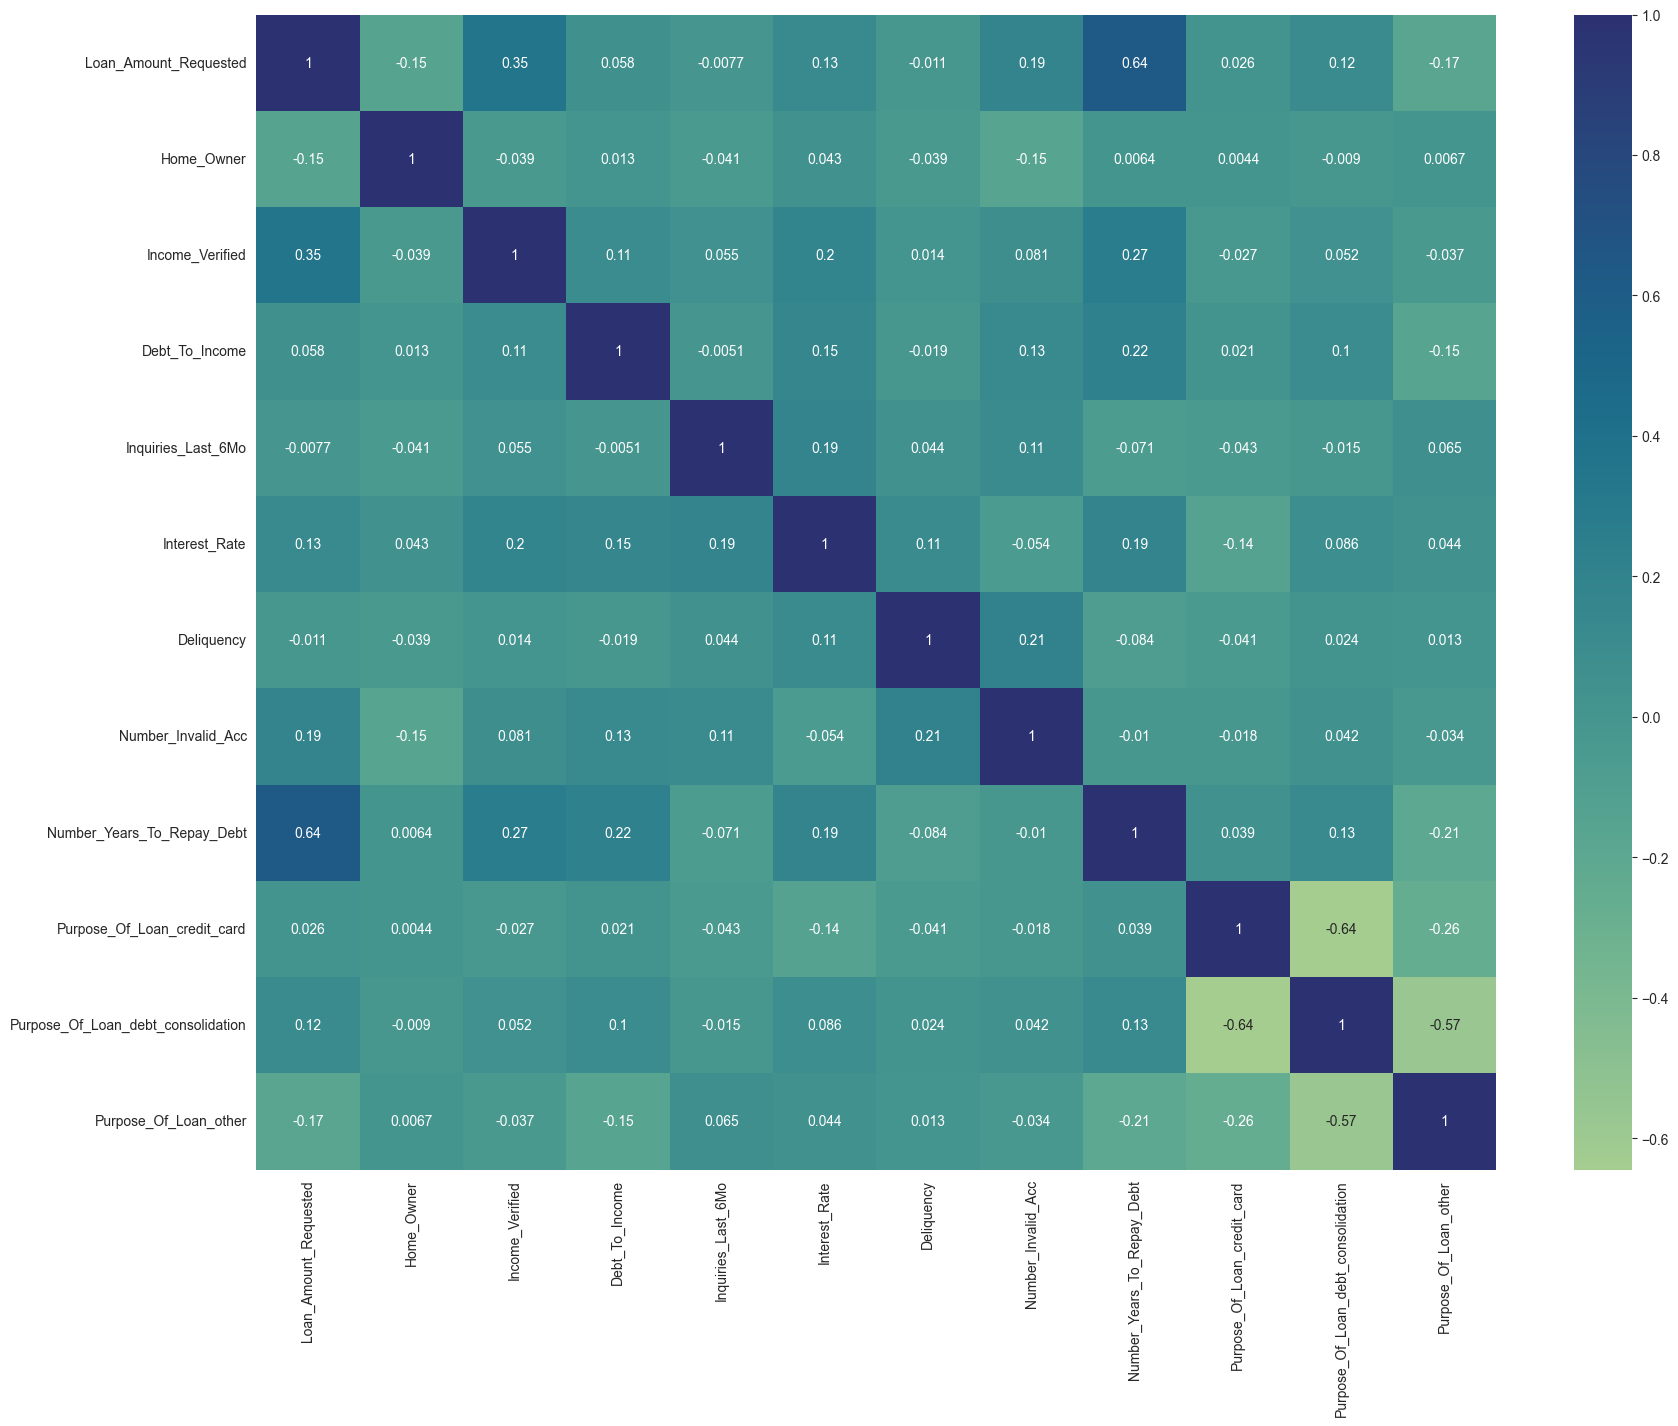

In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """

    df["Home_Owner"] = df["Home_Owner"].apply(lambda x: 0 if x=="Mortgage"
                                                   else 1 if x=="Rent"
                                                   else 2)

    LE_cols = ['Income_Verified', 'Interest_Rate']
    LE = LabelEncoder()
    for i in LE_cols:
        df[i] = df[[i]].apply(LE.fit_transform)

    OHE_cols = ['Purpose_Of_Loan']
    OHE = OneHotEncoder()
    df = pd.get_dummies(df, columns=OHE_cols)

    return df

df2 = apply_feature_engineering(df2)
display(df2.describe())
display(df2.head())
display(df2.corr())
plt.figure(figsize=(20, 15))
sns.heatmap(df2.corr(), annot=True, cmap='crest') # Show heatmap after normalized data

**Split Train-test:**

In [33]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    feature_names = df.columns.tolist()
    feature_names.remove("Interest_Rate")

    X = df[feature_names].values
    y = df.Interest_Rate.values
    return X, y

X, y = prepare_X_y(df2)

In [34]:
from sklearn.model_selection import train_test_split

def split_train_test(X, y, train_size=0.8):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=2023)
    print('Training: ' + str(X_train.shape))
    print('Test: ' + str(X_test.shape))

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_train_test(X, y)

Training: (131400, 11)
Test: (32850, 11)


# 5. Apply the Machine Learning model:

**Up sampling:**

In [35]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_oversampling, y_train_oversampling = smote.fit_resample(X_train, y_train)

**Modeling:**

#### a. Logistic Regression:

In [54]:
# multinomial logistic regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
pca = PCA()

model = LogisticRegression(multi_class='multinomial', solver = 'lbfgs', penalty = 'l2')
pipeline = Pipeline(steps=[("pca", pca), ("scaler", scaler), ("model", model)])

n_components_values = (1,10)
param_grid = {
  "scaler__quantile_range": [(5, 95),(25,75),(20,80)],
  "pca__n_components": n_components_values
  }

search = GridSearchCV(pipeline, param_grid, n_jobs=2)
search.fit(X_train_oversampling, y_train_oversampling)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

predicted_label = search.predict(X_test)
print(classification_report(y_test, predicted_label))

Best parameter (CV score=0.507):
{'pca__n_components': 10, 'scaler__quantile_range': (5, 95)}
              precision    recall  f1-score   support

           0       0.36      0.61      0.45      6763
           1       0.51      0.28      0.36     14038
           2       0.54      0.61      0.57     12049

    accuracy                           0.47     32850
   macro avg       0.47      0.50      0.46     32850
weighted avg       0.49      0.47      0.46     32850



Confusion Matrix:

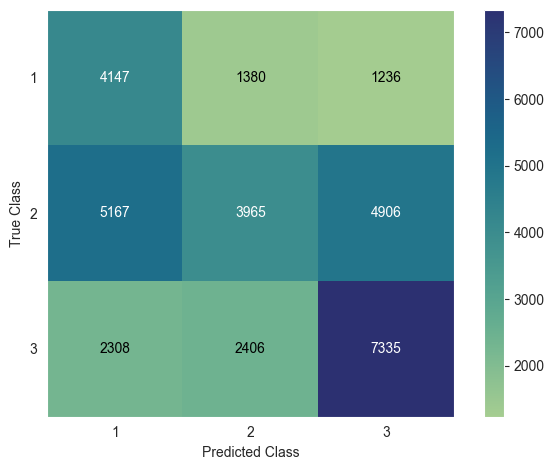

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , predicted_label)

# Plot confusion matrix:
plt.imshow(cm, cmap='crest')
plt.colorbar()

# Set tick labels:
tick_marks = np.arange(3)
plt.xticks(tick_marks, ['1', '2', '3'])
plt.yticks(tick_marks, ['1', '2', '3'])

# Display values in each cell:
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if cm[i, j] > thresh else "black")

# Label axes:
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Remove grid lines:
plt.grid(False)

plt.tight_layout()
plt.show()

#### b. Naive Bayes:

In [56]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

scaler = RobustScaler()
gau_nb = GaussianNB()
pipe = Pipeline(steps=[("scaler", scaler),('pca', PCA()), ("gau_nb", gau_nb)])

n_components_values = (1,11)
param_grid = {
    "scaler__quantile_range": [(5, 95),(25,75),(20,80)],
    "gau_nb__var_smoothing": np.logspace(-4, -9, num=100),
    "pca__n_components": n_components_values
    }

search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=5, verbose=2)
search.fit(X_train_oversampling, y_train_oversampling)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

from sklearn.metrics import classification_report, confusion_matrix
y_pred = search.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Best parameter (CV score=0.509):
{'gau_nb__var_smoothing': 5.590810182512223e-05, 'pca__n_components': 11, 'scaler__quantile_range': (5, 95)}
              precision    recall  f1-score   support

           0       0.34      0.61      0.44      6763
           1       0.50      0.28      0.36     14038
           2       0.54      0.59      0.56     12049

    accuracy                           0.46     32850
   macro avg       0.46      0.49      0.45     32850
weighted avg       0.48      0.46      0.45     32850



**Confusion matrix:**

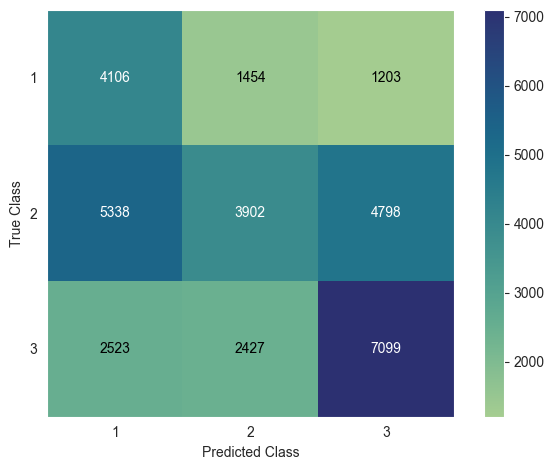

In [57]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test , y_pred)

# Plot confusion matrix:
plt.imshow(cm, cmap='crest')
plt.colorbar()

# Set tick labels:
tick_marks = np.arange(3)
plt.xticks(tick_marks, ['1', '2', '3'])
plt.yticks(tick_marks, ['1', '2', '3'])

# Display values in each cell:
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if cm[i, j] > thresh else "black")

# Label axes:
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Remove grid lines:
plt.grid(False)

plt.tight_layout()
plt.show()

#### c. Decision Tree:

In [58]:
from sklearn.tree import DecisionTreeClassifier

pipe = Pipeline(steps=[
    ("scaler", RobustScaler(quantile_range=(5, 95))),
    ("tree", DecisionTreeClassifier())
])

param_grid = {
    'tree__criterion': ["gini", "entropy", "log_loss"],
    'tree__max_depth': [4, 8, 10, 12]
}

search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=5, verbose=2)
search.fit(X_train_oversampling, y_train_oversampling)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

from sklearn.metrics import classification_report, confusion_matrix
y_pred = search.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameter (CV score=0.528):
{'tree__criterion': 'log_loss', 'tree__max_depth': 10}
              precision    recall  f1-score   support

           0       0.46      0.26      0.33      6763
           1       0.48      0.57      0.52     14038
           2       0.55      0.56      0.56     12049

    accuracy                           0.50     32850
   macro avg       0.50      0.47      0.47     32850
weighted avg       0.50      0.50      0.50     32850



Confusion Matrix:

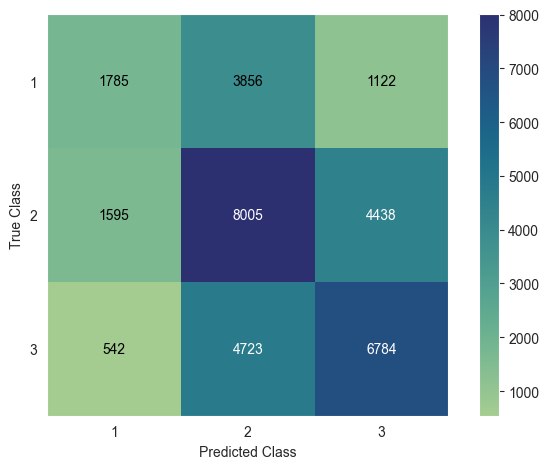

In [59]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test , y_pred)

# Plot confusion matrix:
plt.imshow(cm, cmap='crest')
plt.colorbar()

# Set tick labels:
tick_marks = np.arange(3)
plt.xticks(tick_marks, ['1', '2', '3'])
plt.yticks(tick_marks, ['1', '2', '3'])

# Display values in each cell:
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if cm[i, j] > thresh else "black")

# Label axes:
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Remove grid lines:
plt.grid(False)

plt.tight_layout()
plt.show()

#### d. Random Forest:

In [60]:
# -- Build a full pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([("scaler", RobustScaler(quantile_range=(5, 95))),
                ("tree", RandomForestClassifier(criterion = "gini"))]) #Build a pipeline with a scaler and a model

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    'tree__n_estimators': [250, 300, 350],
    'tree__max_depth': [4, 8, 10, 12]
}

search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_train_oversampling, y_train_oversampling)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

from sklearn.metrics import classification_report
y_pred = search.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameter (CV score=0.550):
{'tree__max_depth': 12, 'tree__n_estimators': 300}
              precision    recall  f1-score   support

           0       0.48      0.31      0.38      6763
           1       0.50      0.57      0.53     14038
           2       0.56      0.58      0.57     12049

    accuracy                           0.52     32850
   macro avg       0.52      0.49      0.49     32850
weighted avg       0.52      0.52      0.51     32850



Confusion Matrix:

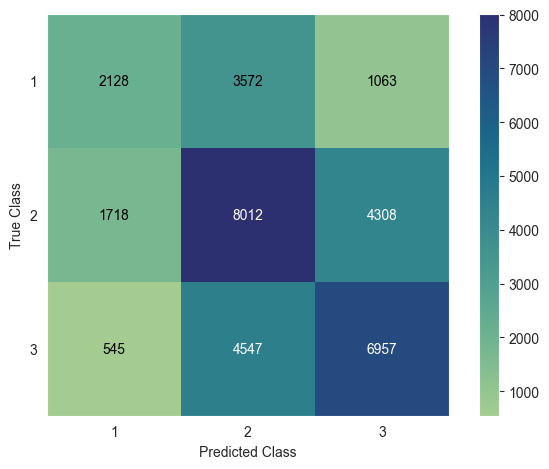

In [61]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test , y_pred)

# Plot confusion matrix:
plt.imshow(cm, cmap='crest')
plt.colorbar()

# Set tick labels:
tick_marks = np.arange(3)
plt.xticks(tick_marks, ['1', '2', '3'])
plt.yticks(tick_marks, ['1', '2', '3'])

# Display values in each cell:
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if cm[i, j] > thresh else "black")

# Label axes:
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Remove grid lines:
plt.grid(False)

plt.tight_layout()
plt.show()

#### e. CatBoost:

In [62]:
from catboost import CatBoostClassifier

scaler = RobustScaler()

cbc = CatBoostClassifier()
pipe = Pipeline(steps=[("scaler", scaler), ("tree", cbc)])


param_grid = {
              'scaler__quantile_range' : [(5, 95)],
              'tree__max_depth': [9,11],
              'tree__learning_rate': [0.01, 0.1, 0.5],
              }

search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=5, verbose=2)
search.fit(X_train_oversampling, y_train_oversampling)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

from sklearn.metrics import classification_report, confusion_matrix
y_pred = search.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


Confusion Matrix:

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test , y_pred)

# Plot confusion matrix:
plt.imshow(cm, cmap='crest')
plt.colorbar()

# Set tick labels:
tick_marks = np.arange(3)
plt.xticks(tick_marks, ['1', '2', '3'])
plt.yticks(tick_marks, ['1', '2', '3'])

# Display values in each cell:
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if cm[i, j] > thresh else "black")

# Label axes:
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Remove grid lines:
plt.grid(False)

plt.tight_layout()
plt.show()

#### f. XGBoost:

In [40]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

scaler = RobustScaler()
xgb = XGBClassifier()
pipe = Pipeline(steps=[("scaler", scaler), ("tree", xgb)])

param_grid = {
    "scaler__quantile_range": [(5, 95),(25,75),(20,80)],
    "tree__max_depth": [5, 7, 9, 10],
    "tree__n_estimators": [50 ,100 ,110 ,130]
              }

search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=5, verbose=2)
search.fit(X_train_oversampling, y_train_oversampling)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

from sklearn.metrics import classification_report, confusion_matrix
y_pred = search.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameter (CV score=0.559):
{'scaler__quantile_range': (5, 95), 'tree__max_depth': 7, 'tree__n_estimators': 100}
              precision    recall  f1-score   support

           0       0.49      0.33      0.39      6763
           1       0.50      0.59      0.54     14038
           2       0.59      0.58      0.58     12049

    accuracy                           0.53     32850
   macro avg       0.53      0.50      0.51     32850
weighted avg       0.53      0.53      0.53     32850



Confusion Matrix:

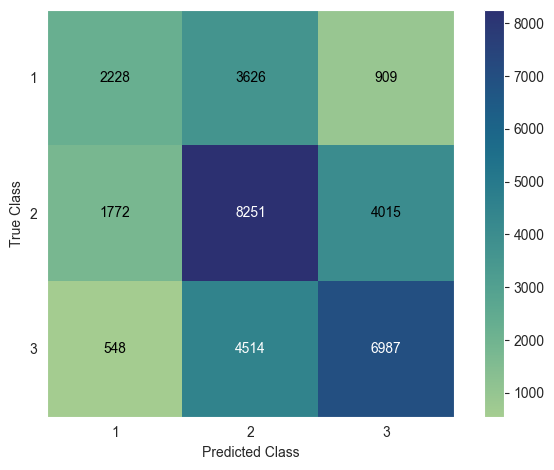

In [41]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test , y_pred)

# Plot confusion matrix:
plt.imshow(cm, cmap='crest')
plt.colorbar()

# Set tick labels:
tick_marks = np.arange(3)
plt.xticks(tick_marks, ['1', '2', '3'])
plt.yticks(tick_marks, ['1', '2', '3'])

# Display values in each cell:
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if cm[i, j] > thresh else "black")

# Label axes:
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Remove grid lines:
plt.grid(False)

plt.tight_layout()
plt.show()

#### g. SVM:

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

model = Pipeline(steps=[
    ("scaler", RobustScaler(quantile_range=(5, 95))),
    ("svc", SVC(kernel='rbf', decision_function_shape='ovr', max_iter=100000))
])

model.fit(X_train_oversampling, y_train_oversampling)

from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Confusion Matrix:

In [36]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test , y_pred)

# Plot confusion matrix:
plt.imshow(cm, cmap='crest')
plt.colorbar()

# Set tick labels:
tick_marks = np.arange(3)
plt.xticks(tick_marks, ['1', '2', '3'])
plt.yticks(tick_marks, ['1', '2', '3'])

# Display values in each cell:
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if cm[i, j] > thresh else "black")

# Label axes:
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Remove grid lines:
plt.grid(False)

plt.tight_layout()
plt.show()

NameError: name 'y_pred' is not defined

#### h. MLP:

In [37]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

model = Pipeline(steps=[
    ("scaler", RobustScaler(quantile_range=(5, 95))),
    ("mlp", MLPClassifier(hidden_layer_sizes=(100, 50), activation= 'logistic', max_iter= 10000))
])

model.out_activation_='softmax'
model.fit(X_train_oversampling, y_train_oversampling)

from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.42      0.43      6763
           1       0.51      0.50      0.50     14038
           2       0.56      0.58      0.57     12049

    accuracy                           0.52     32850
   macro avg       0.50      0.50      0.50     32850
weighted avg       0.51      0.52      0.51     32850



Confusion Matrix:

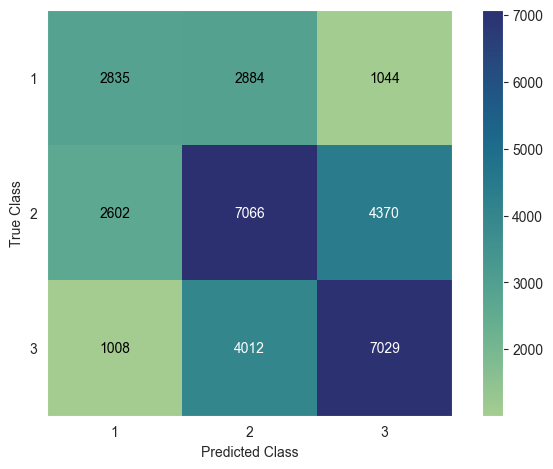

In [38]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test , y_pred)

# Plot confusion matrix:
plt.imshow(cm, cmap='crest')
plt.colorbar()

# Set tick labels:
tick_marks = np.arange(3)
plt.xticks(tick_marks, ['1', '2', '3'])
plt.yticks(tick_marks, ['1', '2', '3'])

# Display values in each cell:
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if cm[i, j] > thresh else "black")

# Label axes:
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Remove grid lines:
plt.grid(False)

plt.tight_layout()
plt.show()

# 6. Discussion & Conclusion:

- Đối với mô hình của bài toán này, nhóm chúng em chọn F1-Score là main score vì F1-score là trung hòa giữa Recall và Precision. Trong việc dự đoán lãi suất cho vay của khách hàng ta mong muốn cả Precision (độ chính xác) và Recall (độ phủ cao), tuy nhiên bộ dữ liệu thực tế và thông tin chưa khách hàng chưa được rõ ràng và chuẩn xác nên Precision và Recall đều có cho kết quả khá thấp và nhận thấy rằng thông số Precision tăng thì Recall sẽ giảm nên ta chọn F1-Score là chỉ số cân bằng cả hai.
- Vì dường như đây là bộ dữ liệu thực tế và có thể có nhiều sai sót trong lúc lên các mô  hình đưa ra đánh giá tương đối khá thấp.

**Logistic Regression:**
- Chọn: macro avg f1-score: 0.46

**Naive Bayes:**
- Chọn: macro avg f1-score: 0.45

**Decision Tree:**
- Chọn: macro avg f1-score: 0.47

**Random Forest:**
- Chọn: macro avg f1-score: 0.49

**XgBoost:**
- Chọn: macro avg f1-score: 0.5

**CatBoost:**
- Chọn: macro avg f1-score: 0.51

**SVM:**
- Chọn: macro avg f1-score: 0.5

**MLP:**
- Chọn: macro avg f1-score: 0.5
- Chọn hidden_layer_sizes = (100,50) tạo ra hai lớp ẩn với số lượng nút tương ứng là 100 và 50